<a href="https://colab.research.google.com/github/Jaeljane/Attendance_Prediction/blob/main/Attendance_DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Introduction**
Develop a robust predictive model that accurately forecasts the daily attendance of employees for the upcoming week.

####**Import the libraries to use**

In [109]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')


from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
#read in the data
data = pd.read_csv('/content/drive/MyDrive/Data Science/Attendance_2.csv')
#create copy to use
df=data.copy()
#size of the dataset
print(df.shape)
#look at the first 5 rows
df.head()

(21912, 12)


,date,day,shift,attendance,Reasons,Employee_Id,Team,Tenure,Month,Week_Numb,Holiday,Holiday_Association
0,12/10/2023,Thursday,Unscheduled,Unscheduled,Other Reasons,A001,T001,>24M,Oct,2,NH,Not_assosiated_with_Holiday
1,12/10/2023,Thursday,Day,Present,Other Reasons,A002,T002,12-24M,Oct,2,NH,Not_assosiated_with_Holiday
2,12/10/2023,Thursday,Day,Present,Other Reasons,A003,T003,>24M,Oct,2,NH,Not_assosiated_with_Holiday
3,12/10/2023,Thursday,Day,Present,Other Reasons,A004,T004,>24M,Oct,2,NH,Not_assosiated_with_Holiday
4,12/10/2023,Thursday,Day,Present,Other Reasons,A005,T005,>24M,Oct,2,NH,Not_assosiated_with_Holiday


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21912 entries, 0 to 21911
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date                 21912 non-null  object
 1   day                  21911 non-null  object
 2   shift                21912 non-null  object
 3   attendance           21912 non-null  object
 4   Reasons              21912 non-null  object
 5   Employee_Id          21866 non-null  object
 6   Team                 21912 non-null  object
 7   Tenure               21677 non-null  object
 8   Month                21912 non-null  object
 9   Week_Numb            21912 non-null  int64 
 10  Holiday              21912 non-null  object
 11  Holiday_Association  21912 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.0+ MB


In [112]:
#Change Date Column into Date Time
df['date']=pd.to_datetime(df['date'], format='%d/%m/%Y'
                          )
#sort data to be in descending order
df=df.sort_values(by='date')

df.reset_index(drop=True, inplace=True)
df.head()

,date,day,shift,attendance,Reasons,Employee_Id,Team,Tenure,Month,Week_Numb,Holiday,Holiday_Association
0,2023-04-28,Friday,Night,Present,Other Reasons,A170,T002,>24M,Apr,5,NH,Not_assosiated_with_Holiday
1,2023-04-28,Friday,Unscheduled,PTO,Other Reasons,NaN,T005,NaN,Apr,5,NH,Not_assosiated_with_Holiday
2,2023-04-28,Friday,Night,Present,Other Reasons,A104,T011,>24M,Apr,5,NH,Not_assosiated_with_Holiday
3,2023-04-28,Friday,Night,Absent,Sick Leave,A184,T009,>24M,Apr,5,NH,Not_assosiated_with_Holiday
4,2023-04-28,Friday,Night,Present,Other Reasons,A084,T002,>24M,Apr,5,NH,Not_assosiated_with_Holiday


####Import The Weather Data
The Weather Data was obtained from **https://www.visualcrossing.com/**


In [113]:
weather = pd.read_csv('/content/drive/MyDrive/Data Science/Nairobi_Weather.csv')
weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Nairobi,2023-04-28,71.0,61.0,64.8,71.0,61.0,64.8,60.5,86.4,...,22.9,10,10,2023-04-28T06:28:08,2023-04-28T18:32:26,0.25,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"HKJK,HKNW,63740099999,63742099999"
1,Nairobi,2023-04-29,71.6,59.0,65.3,71.6,59.0,65.3,59.0,81.1,...,17.4,7,10,2023-04-29T06:28:01,2023-04-29T18:32:16,0.30,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"HKJK,HKNW,63740099999,63742099999"
2,Nairobi,2023-04-30,75.0,62.4,65.7,75.0,62.4,65.7,60.6,84.6,...,15.1,8,10,2023-04-30T06:27:55,2023-04-30T18:32:06,0.33,Overcast,Cloudy skies throughout the day.,cloudy,"HKJK,HKNW,63740099999,63742099999"
3,Nairobi,2023-05-01,71.4,62.4,65.5,71.4,62.4,65.5,60.3,83.8,...,10.0,6,10,2023-05-01T06:27:49,2023-05-01T18:31:57,0.36,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"HKJK,HKNW,63740099999,63742099999"
4,Nairobi,2023-05-02,75.2,59.6,65.7,75.2,59.6,65.7,59.3,81.3,...,16.7,8,10,2023-05-02T06:27:43,2023-05-02T18:31:49,0.39,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"HKJK,remote,HKNW,63740099999,63742099999"


In [114]:
weather['datetime']=pd.to_datetime(weather['datetime'])
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              187 non-null    object        
 1   datetime          187 non-null    datetime64[ns]
 2   tempmax           187 non-null    float64       
 3   tempmin           187 non-null    float64       
 4   temp              187 non-null    float64       
 5   feelslikemax      187 non-null    float64       
 6   feelslikemin      187 non-null    float64       
 7   feelslike         187 non-null    float64       
 8   dew               187 non-null    float64       
 9   humidity          187 non-null    float64       
 10  precip            187 non-null    float64       
 11  precipprob        187 non-null    float64       
 12  precipcover       187 non-null    float64       
 13  preciptype        145 non-null    object        
 14  snow              187 non-

In [115]:
weather.head(10)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Nairobi,2023-04-28,71.0,61.0,64.8,71.0,61.0,64.8,60.5,86.4,...,22.9,10,10,2023-04-28T06:28:08,2023-04-28T18:32:26,0.25,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"HKJK,HKNW,63740099999,63742099999"
1,Nairobi,2023-04-29,71.6,59.0,65.3,71.6,59.0,65.3,59.0,81.1,...,17.4,7,10,2023-04-29T06:28:01,2023-04-29T18:32:16,0.30,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"HKJK,HKNW,63740099999,63742099999"
2,Nairobi,2023-04-30,75.0,62.4,65.7,75.0,62.4,65.7,60.6,84.6,...,15.1,8,10,2023-04-30T06:27:55,2023-04-30T18:32:06,0.33,Overcast,Cloudy skies throughout the day.,cloudy,"HKJK,HKNW,63740099999,63742099999"
3,Nairobi,2023-05-01,71.4,62.4,65.5,71.4,62.4,65.5,60.3,83.8,...,10.0,6,10,2023-05-01T06:27:49,2023-05-01T18:31:57,0.36,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"HKJK,HKNW,63740099999,63742099999"
4,Nairobi,2023-05-02,75.2,59.6,65.7,75.2,59.6,65.7,59.3,81.3,...,16.7,8,10,2023-05-02T06:27:43,2023-05-02T18:31:49,0.39,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"HKJK,remote,HKNW,63740099999,63742099999"
5,Nairobi,2023-05-03,71.6,58.9,63.9,71.6,58.9,63.9,59.3,85.8,...,14.0,7,10,2023-05-03T06:27:38,2023-05-03T18:31:41,0.42,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"HKJK,remote,HKNW,63740099999,63742099999"
6,Nairobi,2023-05-04,76.8,58.6,66.7,76.8,58.6,66.7,56.8,72.9,...,25.8,10,10,2023-05-04T06:27:34,2023-05-04T18:31:34,0.46,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,"HKJK,remote,HKNW,63740099999,63742099999"
7,Nairobi,2023-05-05,77.0,59.2,67.8,77.0,59.2,67.8,57.5,71.7,...,26.7,10,10,2023-05-05T06:27:30,2023-05-05T18:31:27,0.50,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"HKJK,HKNW,63740099999,63742099999"
8,Nairobi,2023-05-06,76.8,62.6,67.7,76.8,62.6,67.7,58.7,74.4,...,25.1,10,10,2023-05-06T06:27:26,2023-05-06T18:31:21,0.52,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"HKJK,HKNW,63740099999,63742099999"
9,Nairobi,2023-05-07,76.8,62.6,68.4,76.8,62.6,68.4,58.4,72.3,...,19.3,10,10,2023-05-07T06:27:23,2023-05-07T18:31:15,0.56,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"HKJK,HKNW,63740099999,63742099999"


####Merge Attendance Dataset With the weather Data

In [116]:
df=df.merge(weather[["datetime",'description']], left_on='date', right_on="datetime", how='left')
df.head()

,date,day,shift,attendance,Reasons,Employee_Id,Team,Tenure,Month,Week_Numb,Holiday,Holiday_Association,datetime,description
0,2023-04-28,Friday,Night,Present,Other Reasons,A170,T002,>24M,Apr,5,NH,Not_assosiated_with_Holiday,2023-04-28,Partly cloudy throughout the day with afternoo...
1,2023-04-28,Friday,Unscheduled,PTO,Other Reasons,NaN,T005,NaN,Apr,5,NH,Not_assosiated_with_Holiday,2023-04-28,Partly cloudy throughout the day with afternoo...
2,2023-04-28,Friday,Night,Present,Other Reasons,A104,T011,>24M,Apr,5,NH,Not_assosiated_with_Holiday,2023-04-28,Partly cloudy throughout the day with afternoo...
3,2023-04-28,Friday,Night,Absent,Sick Leave,A184,T009,>24M,Apr,5,NH,Not_assosiated_with_Holiday,2023-04-28,Partly cloudy throughout the day with afternoo...
4,2023-04-28,Friday,Night,Present,Other Reasons,A084,T002,>24M,Apr,5,NH,Not_assosiated_with_Holiday,2023-04-28,Partly cloudy throughout the day with afternoo...


###**EDA**

Text(0.5, 1.0, 'Attendance')

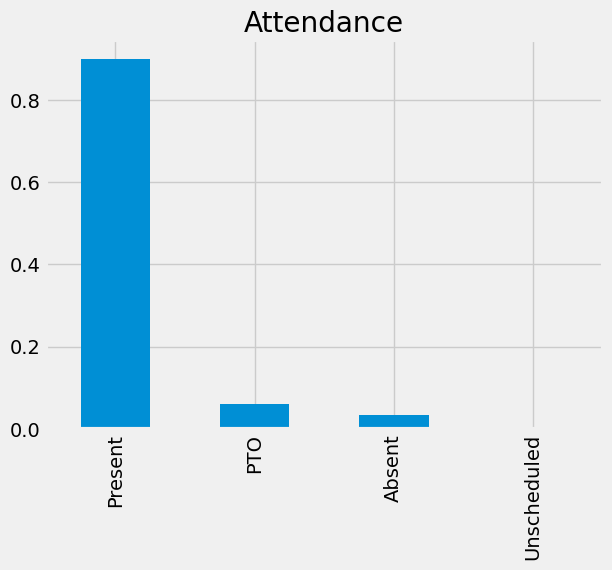

In [117]:
i=df['attendance'].value_counts(normalize=True).plot(kind="bar")
plt.title("Attendance")

- *PTO* (Paid Time Off) encompasses different categories like Annual Leave,
Maternity Leave, Paternity Leave, and more.
- *Unscheduled* can also include cases where employees are on PTO.
- *Absent* covers a broad range of situations, including PTO, Sick Leaves, and Unpaid Leaves.

For this reason, we will encode the data to have Present and Absent only ie PTO and Unschedules will also fall under Absence.

In [118]:
#encode the target variable
df["attendance"] = df["attendance"].apply(lambda x: "Present" if x == "Present" else "Absent")
df['attendance'].value_counts()

Present    19742
Absent      2170
Name: attendance, dtype: int64

In [119]:
#Check for null values
df.isnull().sum()

date                     0
day                      1
shift                    0
attendance               0
Reasons                  0
Employee_Id             46
Team                     0
Tenure                 235
Month                    0
Week_Numb                0
Holiday                  0
Holiday_Association      0
datetime                 0
description              0
dtype: int64

Since we are trying to predict individual employee attendance, it will not be useful having records that miss employee ID hence we would have to drop these records.

In [120]:
#Exclude data with null Employee ID
df = df[~df['Employee_Id'].isnull()]

####Replace unscheduled on Shift

In [121]:
df['shift'].value_counts()

Day            12163
Night           8311
Unscheduled     1392
Name: shift, dtype: int64

Shift is either Day shift or nightshift, unscheduled implies that the Employee was on leave but it doesn't show the shift they were in. Since the whole team alternates between the two shift with an exception of a few we can replace unscheduled with the Most frequent shift for that specific date.

In [122]:
# Calculate the mode for each date
date_mode = df[df['shift'] != 'Unscheduled'].groupby('date')['shift'].apply(lambda x: x.mode().iloc[0]).reset_index()

# Merge the mode back into the original DataFrame
df = df.merge(date_mode, on='date', suffixes=('', '_mode'))

# Replace 'Unscheduled' with the mode
df['shift'] = df.apply(lambda row: row['shift_mode'] if row['shift'] == 'Unscheduled' else row['shift'], axis=1)

# Drop the 'shift_mode' column
df.drop('shift_mode', axis=1, inplace=True)

df.head()

,date,day,shift,attendance,Reasons,Employee_Id,Team,Tenure,Month,Week_Numb,Holiday,Holiday_Association,datetime,description
0,2023-04-28,Friday,Night,Present,Other Reasons,A170,T002,>24M,Apr,5,NH,Not_assosiated_with_Holiday,2023-04-28,Partly cloudy throughout the day with afternoo...
1,2023-04-28,Friday,Night,Present,Other Reasons,A104,T011,>24M,Apr,5,NH,Not_assosiated_with_Holiday,2023-04-28,Partly cloudy throughout the day with afternoo...
2,2023-04-28,Friday,Night,Absent,Sick Leave,A184,T009,>24M,Apr,5,NH,Not_assosiated_with_Holiday,2023-04-28,Partly cloudy throughout the day with afternoo...
3,2023-04-28,Friday,Night,Present,Other Reasons,A084,T002,>24M,Apr,5,NH,Not_assosiated_with_Holiday,2023-04-28,Partly cloudy throughout the day with afternoo...
4,2023-04-28,Friday,Night,Present,Other Reasons,A151,T003,>24M,Apr,5,NH,Not_assosiated_with_Holiday,2023-04-28,Partly cloudy throughout the day with afternoo...


In [123]:
df['shift'].value_counts()

Day      12937
Night     8929
Name: shift, dtype: int64

In [124]:
df_a=df[df['attendance']=="Absent"]
df_a.shape

(2143, 14)

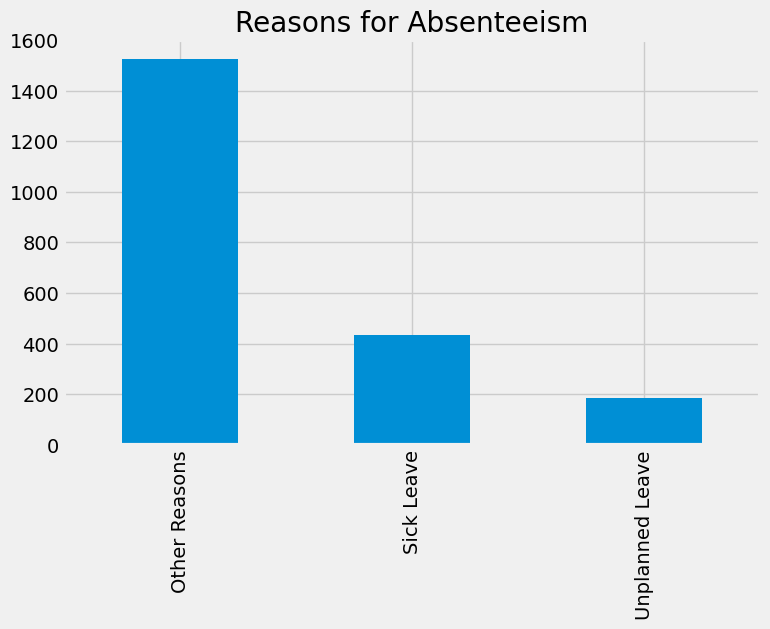

In [125]:
df_a['Reasons'].value_counts().plot(figsize=(8,5),kind="bar", title="Reasons for Absenteeism");

Sick leaves are the most common reason for absenteeism within employees


####Absenteeism using Graphical Representation

In [126]:
#Create a function to create proportions
def proportions(x):
  a=df_a[x].value_counts()
  b=df[x].value_counts()
  c= a.index.union(b.index)

  value_counts_df = b.reindex(c, fill_value=0)
  value_counts_df_a = a.reindex(c, fill_value=0)
  proportions=value_counts_df_a/value_counts_df


  return proportions

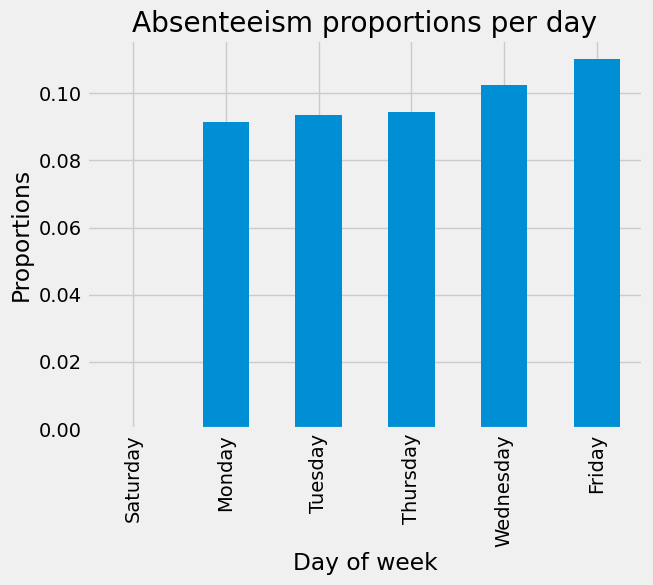

In [127]:
day=proportions('day')
day.sort_values().plot(kind="bar",title= "Absenteeism proportions per day", xlabel="Day of week", ylabel="Proportions");

Saturday is not a working day and if anywork is done on this particular day it is considered Overtime work and should be voluntary.
Fridays on the other hand has the highest rate of absenteeism

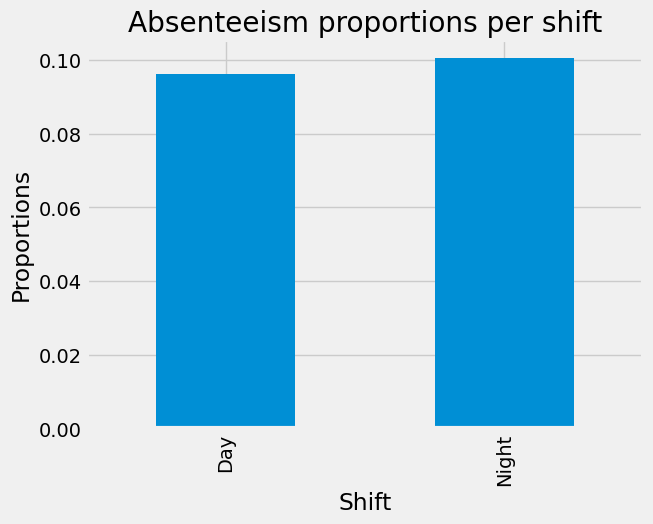

In [128]:
shift=proportions('shift')
shift.sort_values().plot(kind="bar",title= "Absenteeism proportions per shift", xlabel="Shift", ylabel="Proportions");

The night shift has a slightly higher proportion of absenteeism as compared to day shift.

In [129]:
team=proportions("Team").sort_values()
Tenure=proportions('Tenure').sort_values()
Month=proportions("Month")
Week_Numb=proportions("Week_Numb").sort_values()
weather=proportions("description").sort_values()

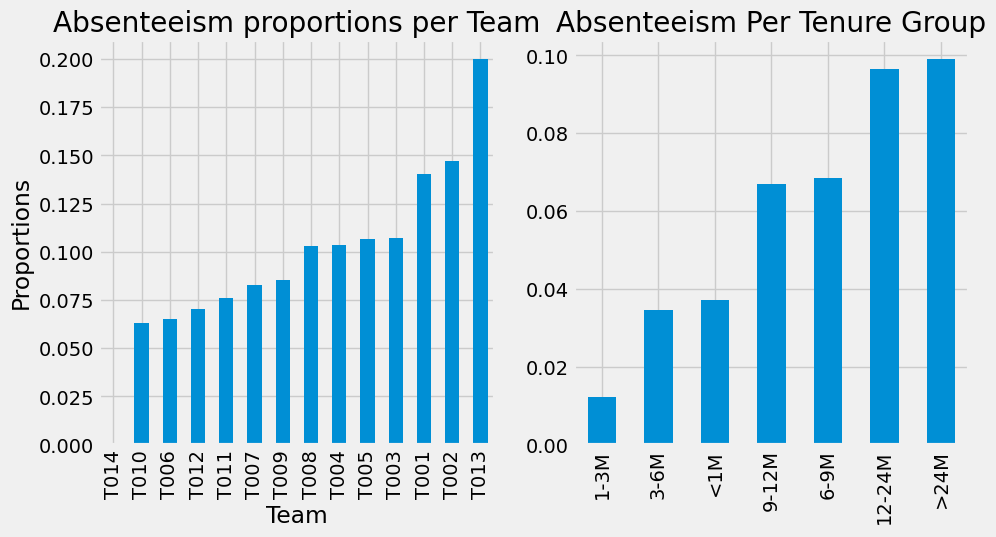

<Figure size 1000x500 with 0 Axes>

In [130]:
# Create a figure and a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2)
plt.figure(figsize=[10, 5])

# Plot data from the DataFrame on the subplots

team.plot(figsize=[10, 5],kind="bar", xlabel="Team", ylabel="Proportions", ax=axs[0])
axs[0].set_title("Absenteeism proportions per Team")

Tenure.plot(figsize=[10, 5], kind="bar" ,ax=axs[1])
axs[1].set_title("Absenteeism Per Tenure Group")

# Show the figure
plt.show();


Team T013 has the highest rate of absenteeism while employees with the longest tenure have a higher absenteeism rate.

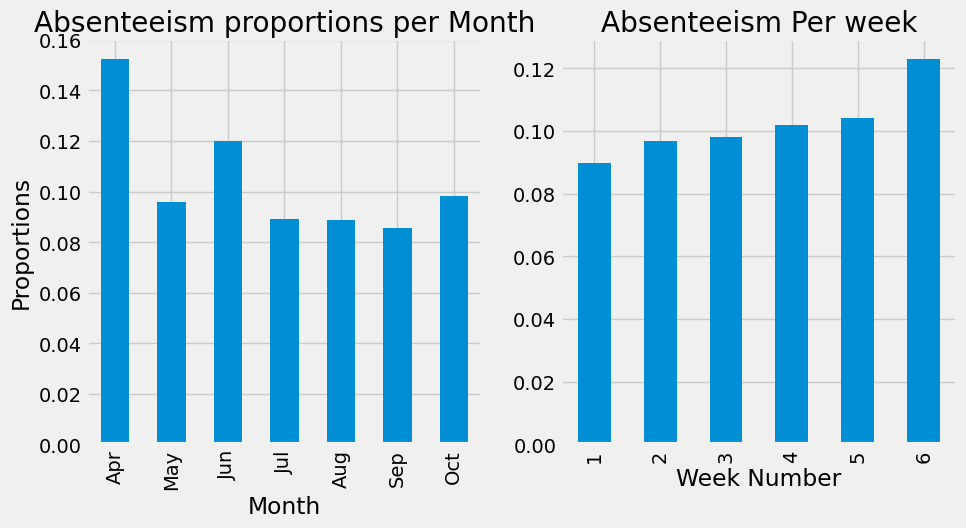

<Figure size 1000x500 with 0 Axes>

In [131]:
# Create a figure and a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2)
plt.figure(figsize=[10, 5])

# Plot data from the DataFrame on the subplots
# Generate the x-ticks for the graph
ticks = ["Apr", 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']
# Convert ticks into string values and to be displayed on the X axis
#labels = ['{}'.format(v) for v in ticks]
Month.plot(figsize=[10, 5],kind="bar", xlabel="Month", ylabel="Proportions", ax=axs[0])
axs[0].set_xticklabels(ticks)
axs[0].set_title("Absenteeism proportions per Month")

tick = ["1", "2", "3", "4", "5", "6"]
Week_Numb.plot(figsize=[10, 5], kind="bar" ,ax=axs[1], xlabel="Week Number")
axs[1].set_title("Absenteeism Per week")
axs[1].set_xticklabels(tick)
# Show the figure
plt.show();

Within the month Absenteeism increases as the month progresses. Also note that week6 happens when date 31st fall on a monday. This happened in July.


In [132]:
df_a['description'].value_counts()

Partly cloudy throughout the day.                                             1502
Partly cloudy throughout the day with late afternoon rain.                     226
Partly cloudy throughout the day with afternoon rain.                          156
Partly cloudy throughout the day with morning rain.                             77
Partly cloudy throughout the day with early morning rain.                       70
Partly cloudy throughout the day with a chance of rain throughout the day.      26
Partly cloudy throughout the day with rain clearing later.                      22
Cloudy skies throughout the day with morning rain.                              22
Cloudy skies throughout the day.                                                22
Partly cloudy throughout the day with rain.                                     20
Name: description, dtype: int64

<Axes: >

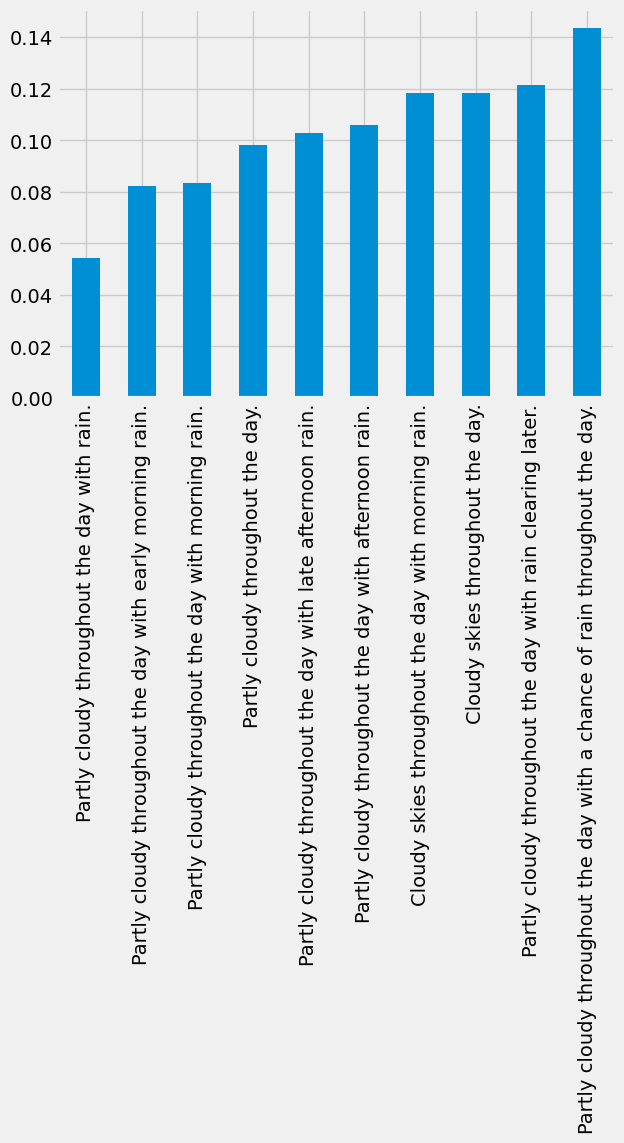

In [133]:
proportions('description').sort_values().plot(kind="bar")

###**Remove outliers**

In [134]:
df['day'].value_counts()

Friday       4425
Thursday     4379
Monday       4364
Wednesday    4355
Tuesday      4241
Saturday      101
Name: day, dtype: int64

In [135]:
#Remove Saturdays data because attendance is voluntary and considered over time work
df=df[df['day']!="Saturday"]

In [136]:
#remove holidays also because working on a holiday is considered overtime and it is voluntary
df['Holiday'].value_counts()

NH    21415
H       350
Name: Holiday, dtype: int64

In [137]:
df=df[df['Holiday']!="H"]
df.head()

,date,day,shift,attendance,Reasons,Employee_Id,Team,Tenure,Month,Week_Numb,Holiday,Holiday_Association,datetime,description
0,2023-04-28,Friday,Night,Present,Other Reasons,A170,T002,>24M,Apr,5,NH,Not_assosiated_with_Holiday,2023-04-28,Partly cloudy throughout the day with afternoo...
1,2023-04-28,Friday,Night,Present,Other Reasons,A104,T011,>24M,Apr,5,NH,Not_assosiated_with_Holiday,2023-04-28,Partly cloudy throughout the day with afternoo...
2,2023-04-28,Friday,Night,Absent,Sick Leave,A184,T009,>24M,Apr,5,NH,Not_assosiated_with_Holiday,2023-04-28,Partly cloudy throughout the day with afternoo...
3,2023-04-28,Friday,Night,Present,Other Reasons,A084,T002,>24M,Apr,5,NH,Not_assosiated_with_Holiday,2023-04-28,Partly cloudy throughout the day with afternoo...
4,2023-04-28,Friday,Night,Present,Other Reasons,A151,T003,>24M,Apr,5,NH,Not_assosiated_with_Holiday,2023-04-28,Partly cloudy throughout the day with afternoo...


In [138]:
#Drop unnecessary columns
#Drop Reasons because it is directly associated with attendance, drop Holiday cause it has only one variable
#Drop datetime because its a repetition of Date
df.drop(columns=['Reasons', 'Holiday', "datetime"], inplace=True)

In [139]:
#set date as index
df.set_index("date", inplace=True)
df.head()

,day,shift,attendance,Employee_Id,Team,Tenure,Month,Week_Numb,Holiday_Association,description
date,,,,,,,,,,
2023-04-28,Friday,Night,Present,A170,T002,>24M,Apr,5,Not_assosiated_with_Holiday,Partly cloudy throughout the day with afternoo...
2023-04-28,Friday,Night,Present,A104,T011,>24M,Apr,5,Not_assosiated_with_Holiday,Partly cloudy throughout the day with afternoo...
2023-04-28,Friday,Night,Absent,A184,T009,>24M,Apr,5,Not_assosiated_with_Holiday,Partly cloudy throughout the day with afternoo...
2023-04-28,Friday,Night,Present,A084,T002,>24M,Apr,5,Not_assosiated_with_Holiday,Partly cloudy throughout the day with afternoo...
2023-04-28,Friday,Night,Present,A151,T003,>24M,Apr,5,Not_assosiated_with_Holiday,Partly cloudy throughout the day with afternoo...


In [140]:
df['attendance'].value_counts()

Present    19272
Absent      2143
Name: attendance, dtype: int64

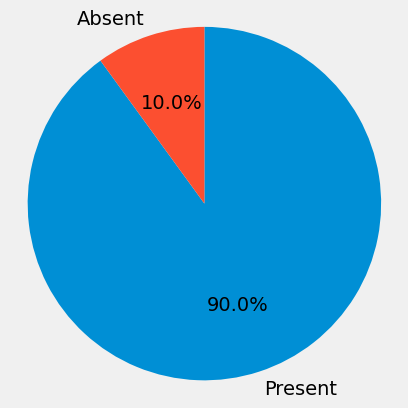

In [141]:
i=df['attendance'].value_counts(normalize=True)
plt.pie(i, labels = i.index, startangle = 90, counterclock = False, autopct='%1.1f%%')
plt.axis('square')
plt.show();

Absenteeism represnts 10% of the attendance, this is good news for the company! Since absenteeism is quite low. However, it also shows us that we have an imbalanced dataset, where our majority class(Present) is far bigger than our minority class(Absent).

###**Split the Dataset**

Split the data into X and Y. The target column is Attendance which will be our Y

In [142]:
target="attendance"
X=df.drop(columns=['attendance'])
y=df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (21415, 9)
y shape: (21415,)


In [143]:
#import libraries to split the data into training and test datasets
from sklearn.model_selection import train_test_split

#retain a test size of 20%
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

print("X_train:", X_train.shape )
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test", y_test.shape)

X_train: (17132, 9)
y_train: (17132,)
X_test: (4283, 9)
y_test (4283,)


In [144]:
X_train.head()

,day,shift,Employee_Id,Team,Tenure,Month,Week_Numb,Holiday_Association,description
date,,,,,,,,,
2023-05-05,Friday,Night,A109,T006,>24M,May,1,Not_assosiated_with_Holiday,Partly cloudy throughout the day.
2023-07-11,Tuesday,Day,A110,T001,>24M,Jul,3,Not_assosiated_with_Holiday,Partly cloudy throughout the day.
2023-08-07,Monday,Night,A107,T011,12-24M,Aug,2,Not_assosiated_with_Holiday,Partly cloudy throughout the day.
2023-06-26,Monday,Night,A043,T002,>24M,Jun,5,Not_assosiated_with_Holiday,Partly cloudy throughout the day with early mo...
2023-07-31,Monday,Day,A081,T010,>24M,Jul,6,Not_assosiated_with_Holiday,Partly cloudy throughout the day.


####**Daily Attendance**

In [145]:
df_p=df[df['attendance']=="Present"]
df_p=df.groupby(["date"])["Employee_Id"].count()
df=df_p.reset_index()
df.set_index('date', inplace = True)
df.rename(columns = {'Employee_Id':'attendance'}, inplace = True)
df_p.head(10)

date
2023-04-28    177
2023-05-02    180
2023-05-03    181
2023-05-04    181
2023-05-05    181
2023-05-08    181
2023-05-09    181
2023-05-10    182
2023-05-11    182
2023-05-12    182
Name: Employee_Id, dtype: int64

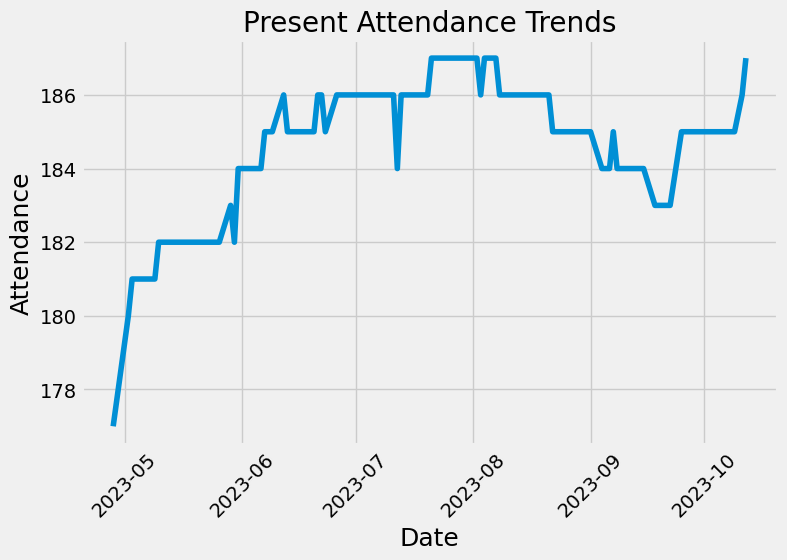

In [146]:
# Visualize the attendance Trends per day
plt.style.use('fivethirtyeight')

plt.style.use('fivethirtyeight')

plt.figure(figsize=(8,5))
plt.title('Present Attendance Trends')

plt.plot(df['attendance'],)

#Label The axis
plt.xlabel('Date', fontsize=18)
plt.xticks(rotation=45)
plt.ylabel('Attendance', fontsize=18)

plt.show()

###**Resample**
Our dataset is unbalanced, with the majority class (Present) making up 90% of the data. This imbalance can lead to skewed predictions that favor the majority class. To address this issue, we can oversample the minority class to equalize its value count with the majority class.

In [147]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [148]:
over_sampler = RandomOverSampler()
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
X_train_over.head()

(30858, 9)


,day,shift,Employee_Id,Team,Tenure,Month,Week_Numb,Holiday_Association,description
0,Friday,Night,A109,T006,>24M,May,1,Not_assosiated_with_Holiday,Partly cloudy throughout the day.
1,Tuesday,Day,A110,T001,>24M,Jul,3,Not_assosiated_with_Holiday,Partly cloudy throughout the day.
2,Monday,Night,A107,T011,12-24M,Aug,2,Not_assosiated_with_Holiday,Partly cloudy throughout the day.
3,Monday,Night,A043,T002,>24M,Jun,5,Not_assosiated_with_Holiday,Partly cloudy throughout the day with early mo...
4,Monday,Day,A081,T010,>24M,Jul,6,Not_assosiated_with_Holiday,Partly cloudy throughout the day.


In [149]:
y_train_over.value_counts()

Present    15429
Absent     15429
Name: attendance, dtype: int64

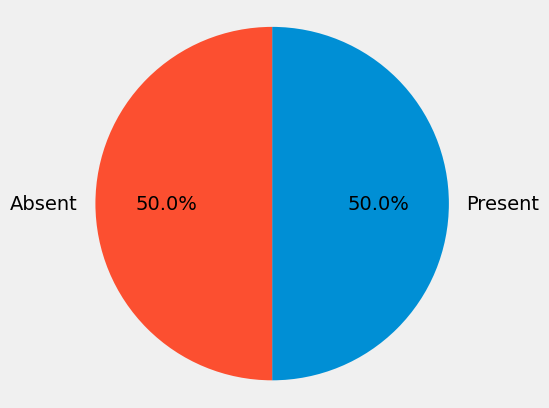

In [150]:
i=y_train_over.value_counts(normalize=True)
plt.pie(i, labels = i.index, startangle = 90, counterclock = False, autopct='%1.1f%%')
plt.axis('square')
plt.show();

Both the monority and Majority class have an equal number of data

###**Build Model**

####**Check the baseline accuracy Score**
 This is a reference point used to evaluate the performance of a machine learning model. It represents the accuracy that a simple, naive model would achieve on a given classification problem.

In [151]:
base_acc=y_train.value_counts(normalize=True).max()
print("Baseline Accuracy Score:", base_acc )

Baseline Accuracy Score: 0.9005953770721457


Our Model should try to beat this score

In [152]:
# !pip install --upgrade pip
# !pip install --upgrade setuptools


In [153]:
#Import libraries needed to build the model
!pip install category_encoders

from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree

####**Make pipeline and Build the Model**

In [154]:
model= make_pipeline(SimpleImputer(strategy='most_frequent'),
                     #OrdinalEncoder(),
                      OneHotEncoder(use_cat_names=True),
                      DecisionTreeClassifier(criterion="entropy", max_depth=95))
model.fit(X_train_over, y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(cols=[0, 1, 2, 3, 4, 5, 6, 7, 8],
                               use_cat_names=True)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=95))])

Comment out the hyperparameter tuning part because it takes a lot of time to run and I incorporated these parameters in Pipeline

In [155]:
# params = {
#     "decisiontreeclassifier__criterion": ['gini', 'entropy'],
#     "decisiontreeclassifier__max_depth": range(20, 100, 10),
#     "decisiontreeclassifier__min_samples_split": range(2, 10),
#     "decisiontreeclassifier__min_samples_leaf": range(1, 5)
# }
# params

# from sklearn.model_selection import GridSearchCV
# model = GridSearchCV(clf, param_grid=params, cv=5, n_jobs=-1,verbose=1)

# # model= make_pipeline(SimpleImputer(strategy='most_frequent'),
# #                       OneHotEncoder(use_cat_names=True),
# #                      DecisionTreeClassifier())
# model.fit(X_train_over, y_train_over)

In [156]:
acc_train=model.score(X_train_over, y_train_over)
acc_test=model.score(X_test, y_test)

print("Accuracy Train Score", round(acc_train, 4))
print("Accuracy Test Score", round(acc_test, 4))

Accuracy Train Score 1.0
Accuracy Test Score 0.9022


Accuracy scores can be misleading when dealing with imbalanced data, because the model may simply be predicting the majority class most of the time. Instead of looking at overall accuracy, we should look at how well the model predicts each class individually. This is because we may be more concerned with the model's performance on the minority class, even if the overall accuracy is high.

###**Confusion matrix**


In [157]:
y_test.value_counts()

Present    3843
Absent      440
Name: attendance, dtype: int64

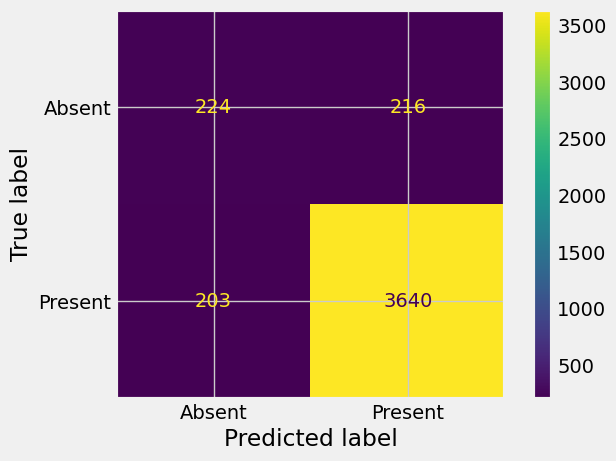

In [158]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

In [159]:
depth = model.named_steps['decisiontreeclassifier'].get_depth()
print(depth)

78


###**Recall and Precision**
Precision is important when we want to make sure our model only predicts absences when it is very confident in its prediction. Recall is important when we want to make sure we identify all absences, even if it means making some mistakes.

In [160]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

      Absent       0.52      0.51      0.52       440
     Present       0.94      0.95      0.95      3843

    accuracy                           0.90      4283
   macro avg       0.73      0.73      0.73      4283
weighted avg       0.90      0.90      0.90      4283



Recall Score measures how well a model identifies observations that belong to the positive class.
Precision measures how well the model identifies observations that belong to the positive class without making an error of a false positive. (Make a careful decision)


###**Get Important Features that influence attendance**

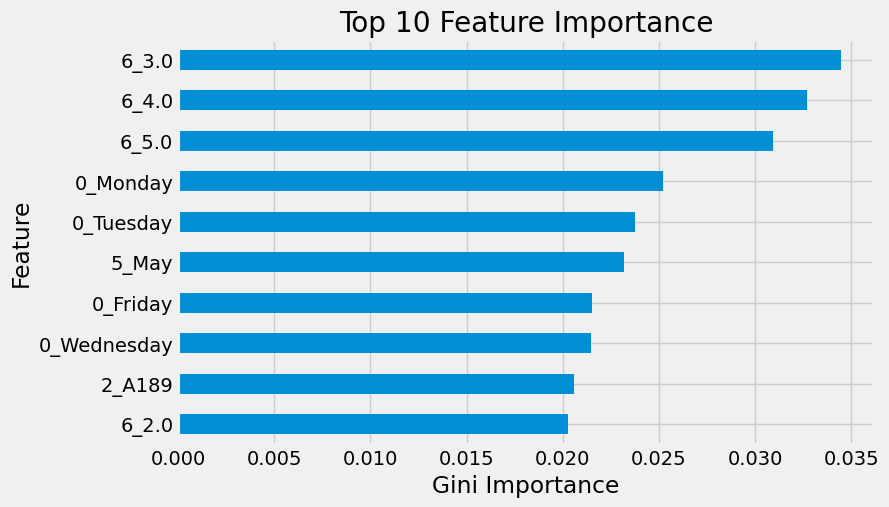

In [161]:
feature_importances = model.named_steps['decisiontreeclassifier'].feature_importances_
# Access the OneHotEncoder from the pipeline
one_hot_encoder = model.named_steps['onehotencoder']

# Get the transformed feature names from the OneHotEncoder
feature_names = one_hot_encoder.get_feature_names_out()

# Create a list of tuples with feature names and their corresponding importances
importance_feature_pairs = list(zip(feature_names, feature_importances))

# Sort the list by feature importances in descending order
importance_feature_pairs.sort(key=lambda x: x[1], reverse=True)

# Create a pandas Series directly from the sorted list
feat_imp = pd.Series([pair[1] for pair in importance_feature_pairs], index=[pair[0] for pair in importance_feature_pairs])

# Create a bar plot for the top 15 features
top_n = 10
feat_imp.head(top_n).sort_values(ascending=True).plot(kind='barh', figsize=(8, 5))
plt.xlabel('Gini Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importance'.format(top_n))
plt.show()


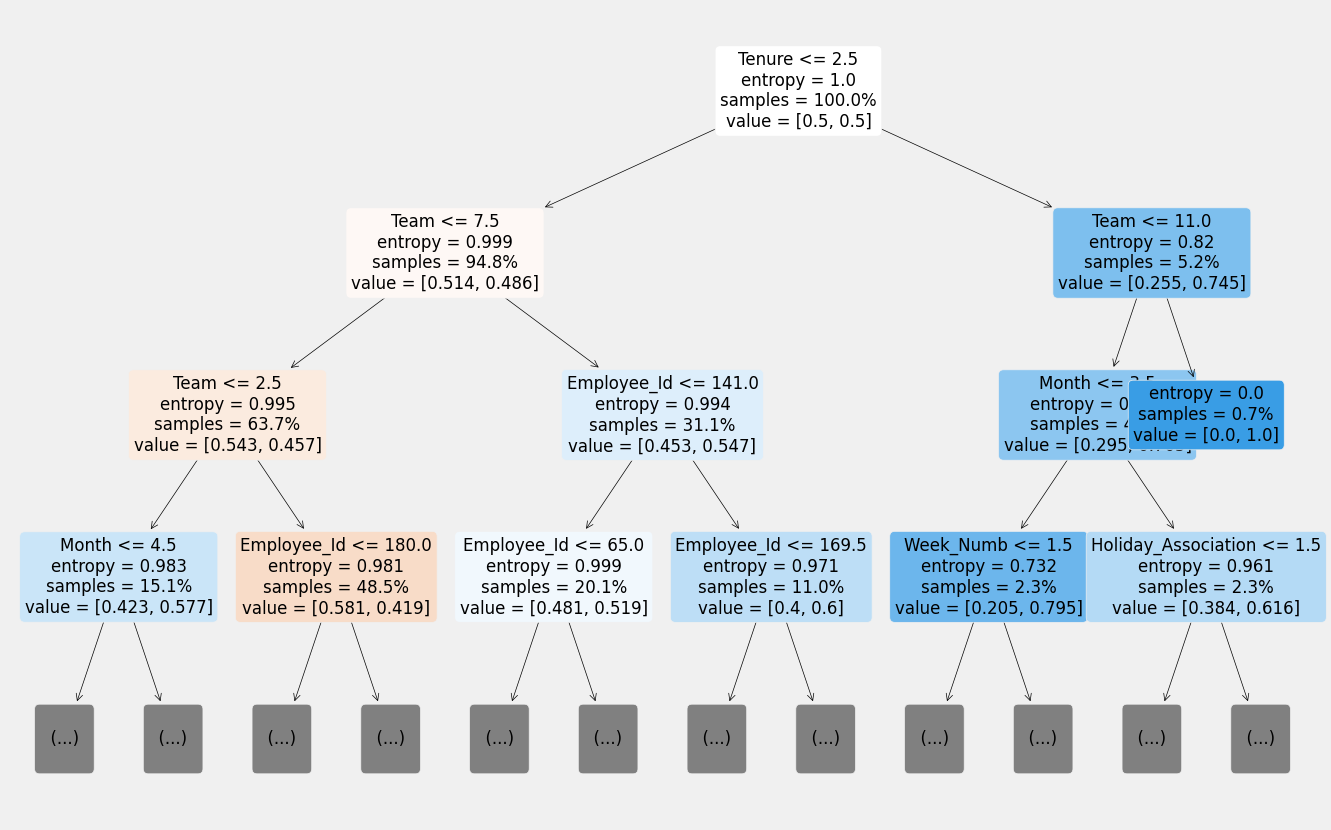

In [104]:
# Create larger figure
fig, ax = plt.subplots(figsize=(15, 10))
# Plot tree
plot_tree(
    decision_tree=model.named_steps['decisiontreeclassifier'],
    feature_names=X_train.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

###**Save Model**

In [184]:
import pickle

In [185]:
#save model
with open("model.pkl", "wb") as f:
  pickle.dump(model, f)

In [256]:
def wrangle(data_path):
  test=pd.read_csv(data_path)

  test=test[~test['Employee_Id'].isnull()]
  test['Week_Numb'] = test['Week_Numb'].astype('object')
  test=test[test['Holiday']!="H"]
  test['shift'].replace('Unscheduled', "Day", inplace =True)
  test.drop(columns=['Reasons', "Holiday"], inplace=True)
  test.set_index("date", inplace=True)
  test=test.drop(columns=['attendance'])

  return test


In [257]:
def make_predictions(data_filepath, model_filepath):
    # Read in the data
    test = wrangle(data_filepath)
    # Load model
    with open (model_filepath, "rb") as f:
        model=pickle.load(f)
    # Generate predictions
    y_test_pred = model.predict(test)
    # Put predictions into Series with name "Absent", and same index as X_test
    y_test_pred = pd.Series(y_test_pred, index=test.index, name="Attendance")
    return y_test_pred

In [258]:
test=wrangle('/content/drive/MyDrive/Data Science/X_test.csv')
print(test.shape)
test.head()

(934, 8)


,day,shift,Employee_Id,Team,Tenure,Month,Week_Numb,Holiday_Association
date,,,,,,,,
19/10/2023,Thursday,Day,A001,T001,>24M,Oct,3.0,Before Holiday
19/10/2023,Thursday,Day,A002,T002,>24M,Oct,3.0,Before Holiday
19/10/2023,Thursday,Day,A003,T003,>24M,Oct,3.0,Before Holiday
19/10/2023,Thursday,Day,A004,T004,>24M,Oct,3.0,Before Holiday
19/10/2023,Thursday,Day,A005,T005,>24M,Oct,3.0,Before Holiday


In [259]:
y_test_pred = make_predictions(
    data_filepath="/content/drive/MyDrive/Data Science/X_test.csv",
    model_filepath="/content/model.pkl",
)

print("predictions shape:", y_test_pred.shape)
y_test_pred.head()

predictions shape: (934,)


date
19/10/2023    Present
19/10/2023    Present
19/10/2023    Present
19/10/2023     Absent
19/10/2023    Present
Name: Absent, dtype: object

In [265]:
y_test_pred=pd.DataFrame(y_test_pred)
y_test_pred=y_test_pred[y_test_pred['Attendance']=="Present"]
y_test_pred=y_test_pred.reset_index()
y_test_pred.head()
y_test_pred=y_test_pred.groupby(['date'])['Attendance'].count()
y_test_pred.head()

date
13/10/2023    180
16/10/2023    176
17/10/2023    182
18/10/2023    174
19/10/2023    163
Name: Absent, dtype: int64